# Twitter and Stock Market Analysis [Group-9]

### Team Members:

Neil Navneet Patel

Dheeraj Kumar

Keerthan Gopu

Vinay Tahiliani

In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime

import warnings
warnings.filterwarnings("ignore")

In [59]:
tweet_analyzer = SentimentIntensityAnalyzer()

In [60]:
c_tweet = pd.read_csv("tweets/Company_Tweet.csv")
tweets = pd.read_csv("tweets/Tweet.csv")

In [61]:
twitter_data = pd.merge(c_tweet, tweets, on='tweet_id', how='inner')

In [62]:
twitter_data.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [63]:
body = twitter_data["body"]
bodySample = body[:10]
body_Sample_dataframe=pd.DataFrame(bodySample)
body_Sample_dataframe

,body
0,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
1,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
2,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
3,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
4,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
5,Rumor Roundup: What to expect when you're expe...
6,"An $AAPL store line in Sapporo Japan for the ""..."
7,$AAPL - Will $AAPL Give Second entry opportuni...
8,Will $AAPL Give Second entry opportunity? $AAP...
9,We will book gains in half dozen picks tomorro...


### Defining a Function to check for the Negative Tweets

Determine the degree of negativity in a given sentence using the provided sentiment analysis function, negativityCheck. The sentiment strength of the sentence, including its positive, negative, and neutral components, is represented by the polarity ratings. The function focuses specifically on the sentence's "negative" polarity score, which represents the intensity of negative emotion. When a sentence's negative polarity score exceeds 0.7, it is deemed to have a strong amount of negativity.

In [64]:
def Check_for_negative_tweets(body):
    polarity_scores = tweet_analyzer.polarity_scores(body)
    if polarity_scores["neg"] > 0.7:
        return 1
    else:
        return 0

In [65]:
body_Sample_dataframe["negative"]=pd.DataFrame(sentenceSample.apply(negativityCheck).tolist())

In [66]:
body_Sample_dataframe

,body,negative
0,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0
1,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0
2,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0
3,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0
4,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0
5,Rumor Roundup: What to expect when you're expe...,0
6,"An $AAPL store line in Sapporo Japan for the ""...",0
7,$AAPL - Will $AAPL Give Second entry opportuni...,0
8,Will $AAPL Give Second entry opportunity? $AAP...,0
9,We will book gains in half dozen picks tomorro...,0


In [67]:
bodySample.head()

0    #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
1    #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
2    #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
3    #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
4    #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
Name: body, dtype: object

In [68]:
twitter_data.shape

(4336445, 8)

In [69]:
import pandas as pd

negative_sentiments = body.apply(negativityCheck).tolist()

twitter_data["negative_sentiment"] = negative_sentiments

body_Sample_dataframe["negative"] = negative_sentiments


In [71]:
twitter_data.head(30)

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,0
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,0
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,0
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,0
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,0
5,550803225113157632,AAPL,MacHashNews,1420156696,Rumor Roundup: What to expect when you're expe...,0,0,0,0
6,550802957370159104,AAPL,WaltLightShed,1420156633,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,0
7,550802855129382912,AAPL,2waystrading,1420156608,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,0
8,550802745737768960,AAPL,TV_TradingIdeas,1420156582,Will $AAPL Give Second entry opportunity? $AAP...,0,0,0,0
9,550797494188142592,AAPL,Weeklyoptions,1420155330,We will book gains in half dozen picks tomorro...,0,0,1,0


In [73]:
tweet_neg = twitter_data.loc[twitter_data["negative_sentiment"]==1]

In [74]:
tweet_neg

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment
4967,552492485617147904,AAPL,RealFanboy101,1420559448,$AAPL pathetic and weak,0,0,0,1
4969,552492285724987395,AAPL,shawncj6,1420559400,$AAPL dump,0,0,0,1
5271,552455561342906368,AAPL,neodocjdg,1420550644,$AAPL Dead cat died? $SPY,1,0,0,1
6348,552865235661381632,AAPL,RealFanboy101,1420648318,$AAPL ugly ugly candles,0,0,0,1
16725,555748731992440832,AAPL,shawncj6,1421335797,$AAPL weakness,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4300490,1197827760967712770,TSLA,TLC00001,1574419367,$TSLA Pitiful. Absolutely Pitiful.,0,0,1,1
4300896,1197870998332346368,TSLA,chipgoines,1574429676,Bloody hell. @tesla Cybertruck. #Cybertruck,0,0,1,1
4317575,1205130697696043009,TSLA,montpbm,1576160523,$TSLA Stupid daytraders smh,0,0,0,1
4325821,1208140244702416896,TSLA,GreenleafOTTS,1576878055,WTF is happening!,1,0,0,1


In [75]:
twitter_data.ticker_symbol.unique()

array(['AAPL', 'AMZN', 'GOOGL', 'TSLA', 'GOOG', 'MSFT'], dtype=object)

In [76]:
df = pd.read_csv("stock_market_data/nasdaq/csv/AMZN.csv")

In [77]:
df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,15-05-1997,1.927083,2.437500,72156000,2.500000,1.958333,1.958333
1,16-05-1997,1.708333,1.968750,14700000,1.979167,1.729167,1.729167
2,19-05-1997,1.625000,1.760417,6106800,1.770833,1.708333,1.708333
3,20-05-1997,1.635417,1.729167,5467200,1.750000,1.635417,1.635417
4,21-05-1997,1.375000,1.635417,18853200,1.645833,1.427083,1.427083


In [78]:
neg_tweet_of_AMZ = tweet_neg.loc[tweet_neg['ticker_symbol'] =="AMZN"]

In [79]:
neg_tweet_of_AMZ.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment
1471910,1055793751610810368,AMZN,BZstockss,1540555820,$ARYC Hell ya!,0,2,3,1
1529692,1074429688855126016,AMZN,PennyGodfather,1544998974,That's no H/S friend,0,0,0,1
1546978,1080842025086398464,AMZN,kamiari_,1546527794,Puke Puke Puke!!!! $SPX $NFLX $AMZN $AAPL,0,0,1,1
2544920,558322371283922944,AMZN,sonaliranade,1421949401,No $AMZN LOL,0,0,0,1
2587463,621694276586577920,AMZN,parabolicoption,1437058440,$AMZN firing...,0,0,0,1


In [80]:
neg_tweet_of_AMZ['Date'] = pd.to_datetime(neg_tweet_of_AMZ['post_date'],unit='s').dt.strftime('%d-%m-%Y')

In [81]:
neg_tweet_of_AMZ

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment,Date
1471910,1055793751610810368,AMZN,BZstockss,1540555820,$ARYC Hell ya!,0,2,3,1,26-10-2018
1529692,1074429688855126016,AMZN,PennyGodfather,1544998974,That's no H/S friend,0,0,0,1,16-12-2018
1546978,1080842025086398464,AMZN,kamiari_,1546527794,Puke Puke Puke!!!! $SPX $NFLX $AMZN $AAPL,0,0,1,1,03-01-2019
2544920,558322371283922944,AMZN,sonaliranade,1421949401,No $AMZN LOL,0,0,0,1,22-01-2015
2587463,621694276586577920,AMZN,parabolicoption,1437058440,$AMZN firing...,0,0,0,1,16-07-2015
...,...,...,...,...,...,...,...,...,...,...
3094413,1197588955673309184,AMZN,Pennywinning7,1574362431,$amzn ugh,0,0,0,1,21-11-2019
3097872,1202267422302060544,AMZN,AldrinWong,1575477865,$AMZN wrong!,0,0,0,1,04-12-2019
3098370,1202678620088610816,AMZN,Mr_MoonStocks,1575575902,Wtf $amzn,0,0,0,1,05-12-2019
3103705,1210242544111480832,AMZN,LAVAoption,1577379282,$AMZN CRAZY!!!,0,1,3,1,26-12-2019


In [82]:
Inf_AMZ= pd.merge(neg_tweet_of_AMZ,df,on="Date",how="inner")

In [83]:
Inf_AMZ.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment,Date,Low,Open,Volume,High,Close,Adjusted Close
0,1055793751610810368,AMZN,BZstockss,1540555820,$ARYC Hell ya!,0,2,3,1,26-10-2018,1603.000000,1649.589966,14963800,1698.459961,1642.810059,1642.810059
1,1080842025086398464,AMZN,kamiari_,1546527794,Puke Puke Puke!!!! $SPX $NFLX $AMZN $AAPL,0,0,1,1,03-01-2019,1497.109985,1520.010010,6975600,1538.000000,1500.280029,1500.280029
2,558322371283922944,AMZN,sonaliranade,1421949401,No $AMZN LOL,0,0,0,1,22-01-2015,300.000000,300.000000,5362600,312.250000,310.320007,310.320007
3,621694276586577920,AMZN,parabolicoption,1437058440,$AMZN firing...,0,0,0,1,16-07-2015,464.799988,465.500000,4095600,475.880005,475.480011,475.480011
4,624310535408893953,AMZN,TRADEaddiction,1437682205,$AMZN leak?,1,0,0,1,23-07-2015,475.700012,491.660004,9374400,491.660004,482.179993,482.179993


In [84]:
AMZ_date_count= neg_tweet_of_AMZ["Date"].value_counts()

In [85]:
import pandas as pd

AMZ_date_count = pd.DataFrame(AMZ_date_count)

print(AMZ_date_count.head())

AMZ_date_count.reset_index(drop=True, inplace=True)

In [86]:
AMZ_date_count.head(5)

,index,Date
0,09-08-2019,3
1,02-04-2019,2
2,17-03-2016,2
3,27-04-2018,2
4,17-12-2018,2


In [87]:
AMZ_date_count["count"] = AMZ_date_count["Date"]

AMZ_date_count.drop("Date", axis=1, inplace=True)

AMZ_date_count.rename(columns={"index": "Date"}, inplace=True)


In [137]:
Inf_AMZ_by_no= pd.merge(AMZ_date_count,df,on="Date",how="inner")

In [138]:
Inf_AMZ_by_no.head()

,index,count,Date,Low,Open,Volume,High,Close,Adjusted Close
0,09-08-2019,3,09-08-2019,1802.219971,1828.949951,2879800,1831.089966,1807.579956,1807.579956
1,02-04-2019,2,02-04-2019,1805.119995,1811.020020,3448100,1820.000000,1813.979980,1813.979980
2,17-03-2016,2,17-03-2016,555.010010,569.510010,5928100,571.400024,559.440002,559.440002
3,27-04-2018,2,27-04-2018,1567.390015,1634.010010,13053200,1638.099976,1572.619995,1572.619995
4,17-12-2018,2,17-12-2018,1505.010010,1566.000000,8829800,1576.130005,1520.910034,1520.910034


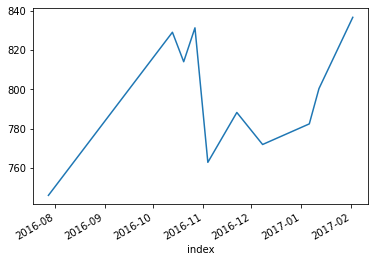

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

date_format = "%d-%m-%Y"
Inf_AMZ_by_no["index"] = pd.to_datetime(Inf_AMZ_by_no["index"], format=date_format)

Inf_AMZ_by_no.set_index("index", inplace=True)

data_for_specific_date = Inf_AMZ_by_no.loc["2016-07-28"]

data_for_date_range = Inf_AMZ_by_no.loc['2016-07-28':'2017-05-23']

ax = data_for_date_range["Open"].plot()

ax.set_xlabel("Date")
ax.set_ylabel("Opening Price")
ax.set_title("Amazon Stock Opening Price from 2016-07-28 to 2017-05-23")

plt.show()


,count,Date,Low,Open,Volume,High,Close,Adjusted Close,dateTime
index,,,,,,,,,
2015-01-22,1,22-01-2015,300.000000,300.000000,5362600,312.250000,310.320007,310.320007,2015-01-22
2015-12-07,1,07-12-2015,660.500000,674.739990,3732800,675.460022,669.830017,669.830017,2015-07-12
2015-07-16,1,16-07-2015,464.799988,465.500000,4095600,475.880005,475.480011,475.480011,2015-07-16
2015-07-23,2,23-07-2015,475.700012,491.660004,9374400,491.660004,482.179993,482.179993,2015-07-23
2015-10-22,1,22-10-2015,556.669983,562.700012,7779400,569.150024,563.909973,563.909973,2015-10-22


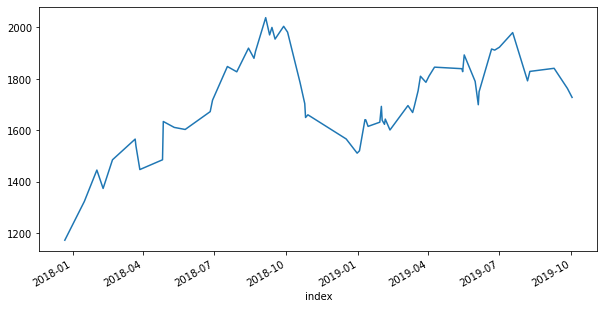

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

Inf_AMZ_by_no["dateTime"] = pd.to_datetime(Inf_AMZ_by_no["Date"])

Inf_AMZ_by_no = Inf_AMZ_by_no.sort_values(by="dateTime")

data_for_date_range = Inf_AMZ_by_no.loc['2017-07-12':'2019-07-10']

bx = data_for_date_range.plot(x="dateTime", y="Open", figsize=(10, 5))

bx.set_xlabel("Date")
bx.set_ylabel("Opening Price")
bx.set_title("Amazon Stock Opening Price from 2017-07-12 to 2019-07-10")

plt.show()

print(Inf_AMZ_by_no.head())


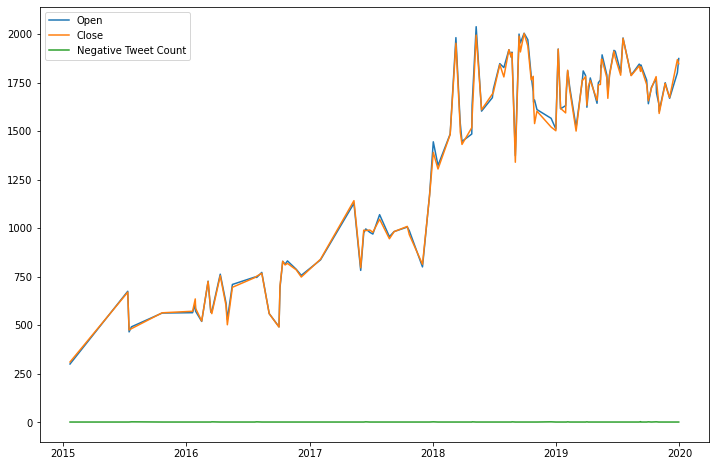

In [92]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

opening_value = Inf_AMZ_by_no["Open"]
closing_value = Inf_AMZ_by_no["Close"]
tweet_count = Inf_AMZ_by_no["count"]
dates = Inf_AMZ_by_no["dateTime"]

ax.plot(dates, opening_value, label="Open")
ax.plot(dates, closing_value, label="Close")
ax.plot(dates, tweet_count, label="Negative Tweet Count")

ax.set_xlabel("Date")
ax.set_ylabel("Stock Price / Tweet Count")
ax.set_title("Amazon Stock Price and Negative Tweet Count over Time")

ax.legend()

plt.show()
